In [ ]:
"""
During cleaning data we ought to delete all correlations - one of two 'similar' columns. 
Unfortunately this is the reason why we have to find functions for deleted datas, 
but 'cause of that our data set will be smaller, as well as calculations quicker. 
"""

In [1]:
#start with - data_cleaning
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

taxi=pd.read_csv('datas.csv')
#len(taxi) - 311734, too big. Take smaller sample, this won't do anything with our correlations. 
#if they are, they will be in the first few lines (f.e. 1000).
taxi=taxi[:1000]
taxi.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.841000,1.040000,122.92300,129.067000,1.449000,3.356080,13.423500,0.494500,0.495000,3.034520,0.074880,0.297000,17.987400,1.003000,1.010000
std,0.365859,0.398194,84.43637,81.935303,1.128128,2.904604,8.876976,0.052177,0.049774,1.854574,0.652785,0.029865,10.469481,0.094868,0.099549
min,1.000000,1.000000,7.00000,4.000000,1.000000,0.010000,3.000000,0.000000,0.000000,0.010000,0.000000,0.000000,4.880000,1.000000,1.000000
25%,2.000000,1.000000,42.00000,54.000000,1.000000,1.250000,6.875000,0.500000,0.500000,1.760000,0.000000,0.300000,9.960000,1.000000,1.000000
50%,2.000000,1.000000,97.00000,112.000000,1.000000,2.315000,10.500000,0.500000,0.500000,2.440000,0.000000,0.300000,14.305000,1.000000,1.000000
75%,2.000000,1.000000,188.25000,210.250000,1.000000,4.687500,18.000000,0.500000,0.500000,3.990000,0.000000,0.300000,23.760000,1.000000,1.000000
max,2.000000,5.000000,260.00000,265.000000,6.000000,18.540000,60.500000,0.500000,0.500000,11.010000,5.760000,0.300000,71.070000,4.000000,2.000000


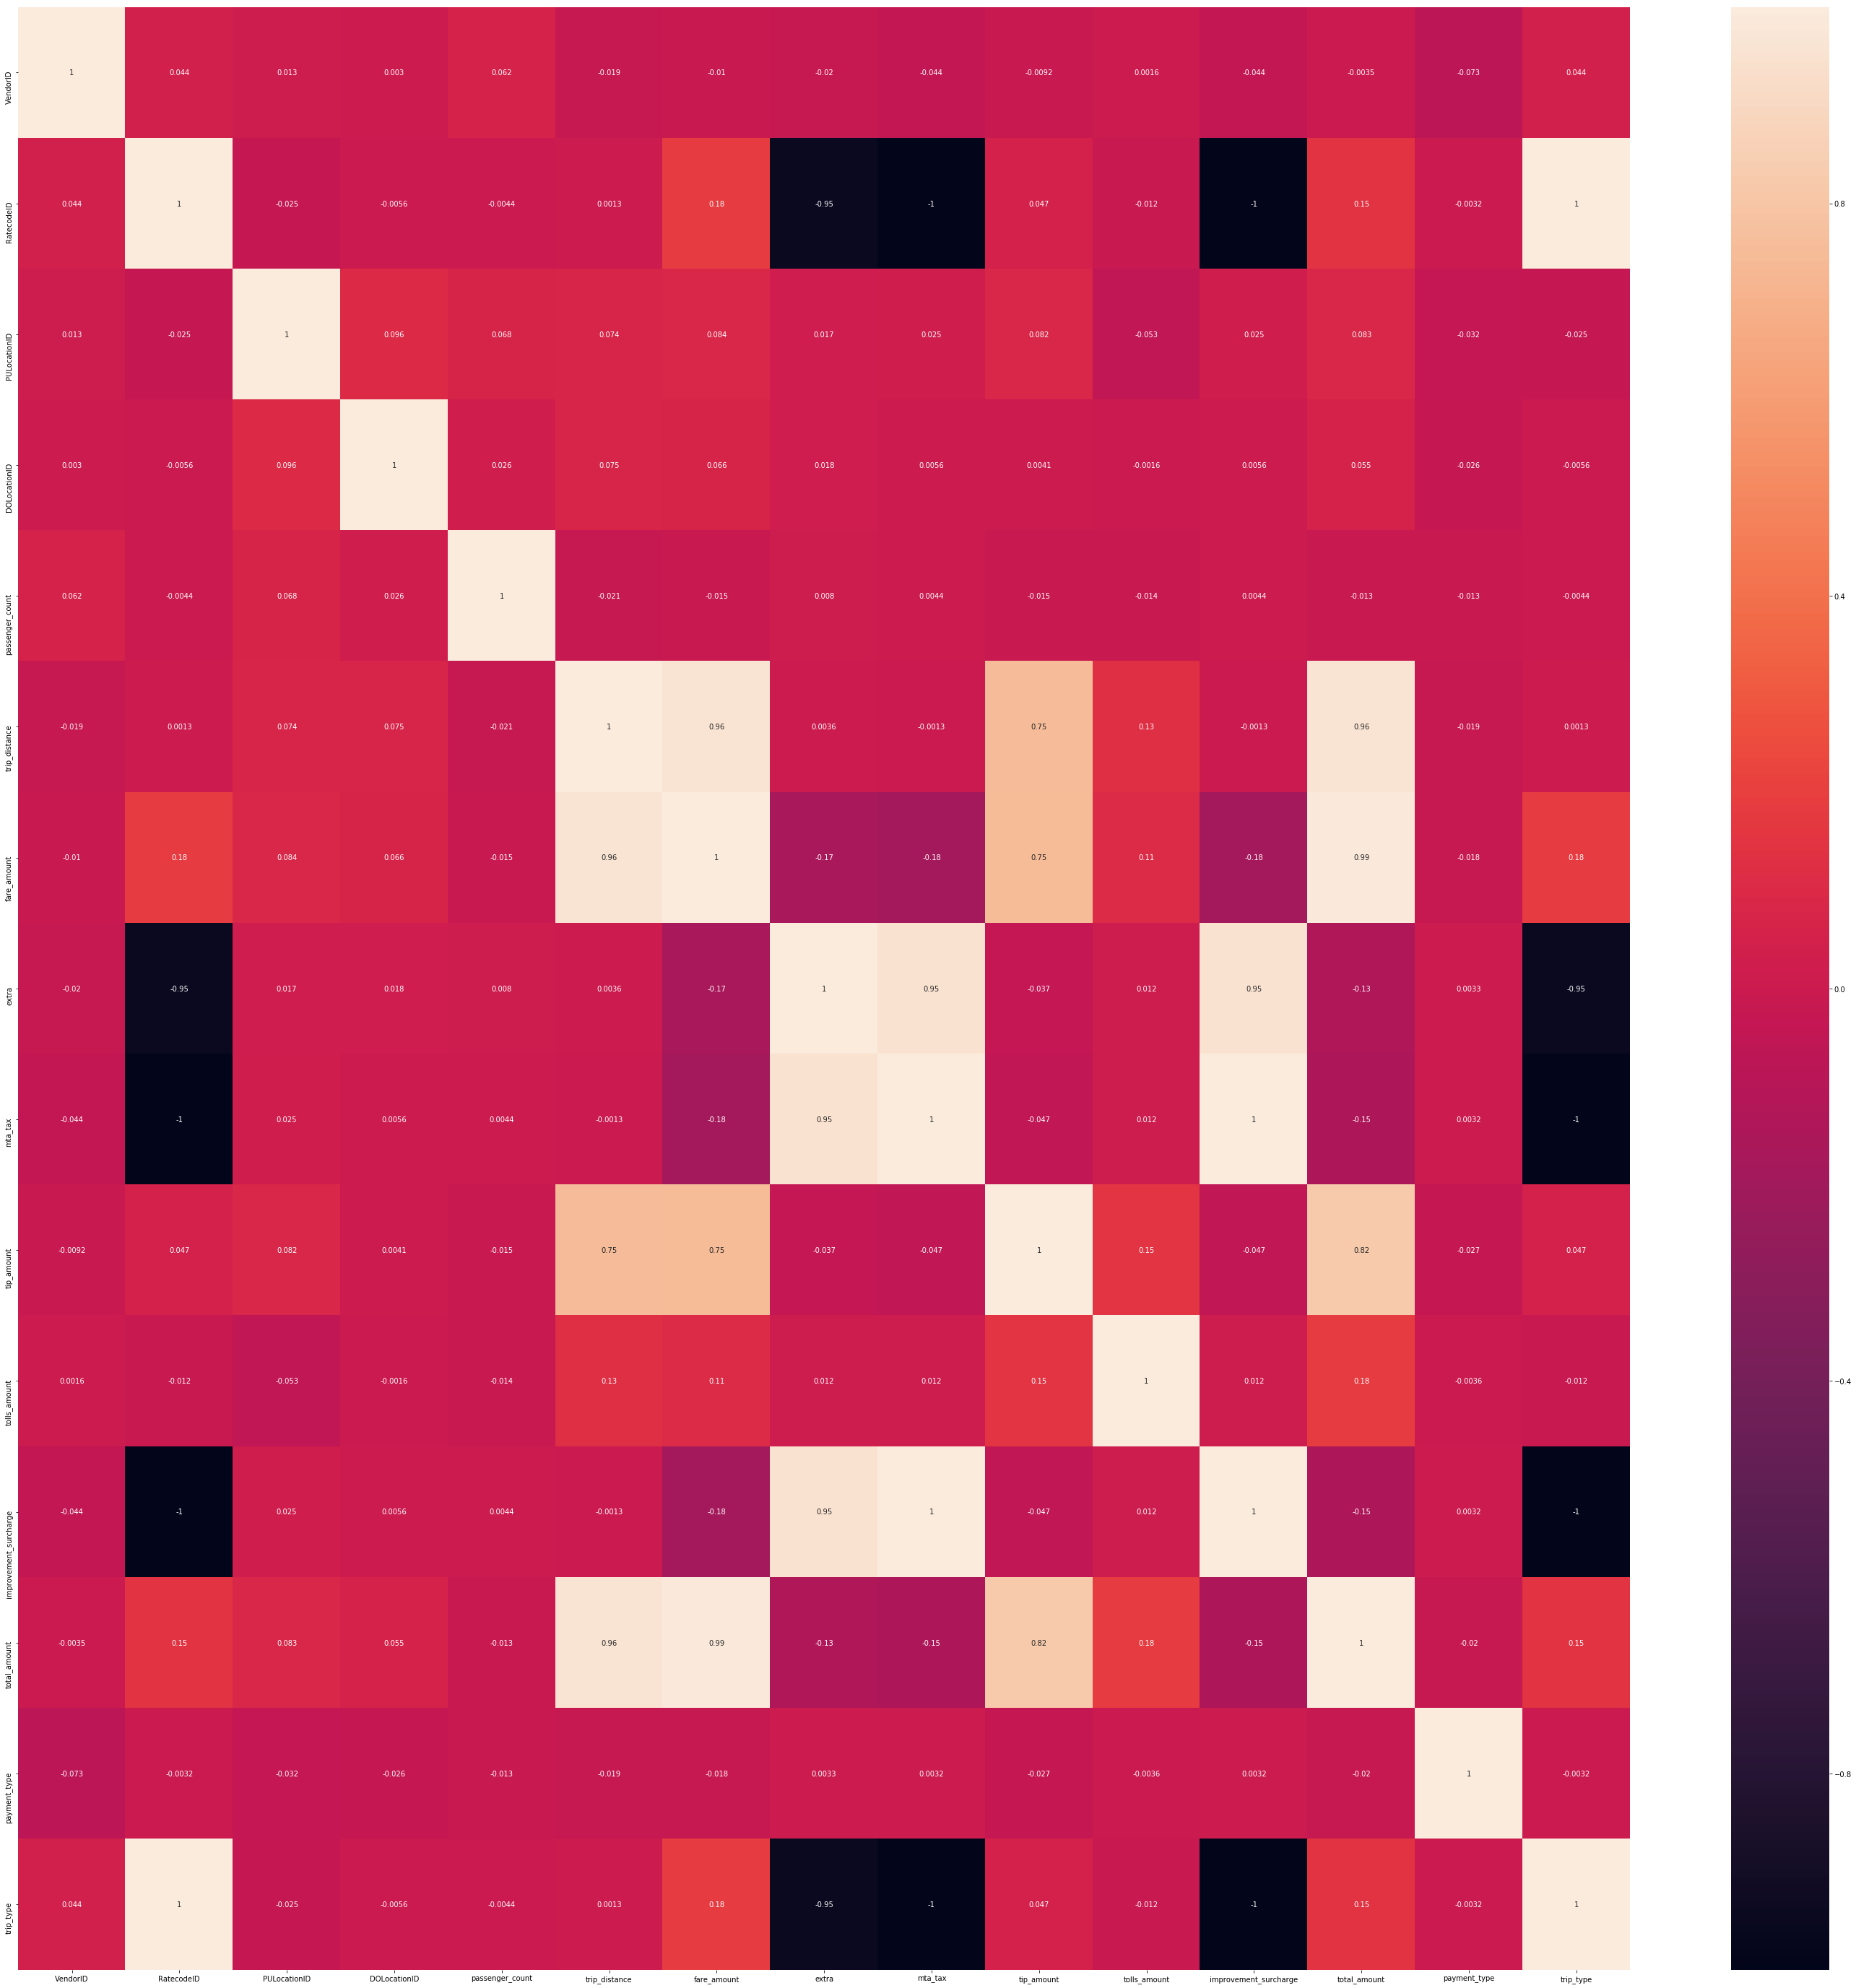

In [3]:
#make heat map of correlations
plt.figure(figsize=(50,50))
sns.heatmap(taxi.corr(), annot=True)
plt.show()
#we ought to delete one of two columns from black/white squares (strong correlation between them). 

In [ ]:
"""
Correlations > 0.8 or < -0.8:
RatecodeID - extra
RatecodeID - mta_tax
RatecodeID - improvement_surcharge
RatecodeID - trip_type
trip_distance - fare_amount
trip_distance - total_amount
fare_amount - total_amount
extra - mta_tax
extra - improvement_surcharge
extra - trip_type
mta_tax - improvement_surcharge
mta_tax - trip_type
tip_amount - total_amount
improvement_surcharge - trip_type


for better view we can show all graphs between rows with using:

sns.pairplot(taxi)
plt.show()

unfortunately our data set has too many columns for this checking - we won't see too much. 
We can take only two or three columns, of course. But above code is a good solution for smaller collections. 
"""

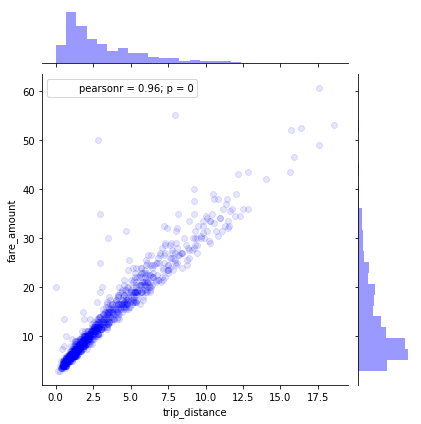

In [4]:
sns.jointplot(taxi['trip_distance'], taxi['fare_amount'], alpha=0.1, color='blue')
plt.show()
#yes, we have correlation - pearsonr = 0.96 and, hey, look at the plot!
#we should delete one of this column

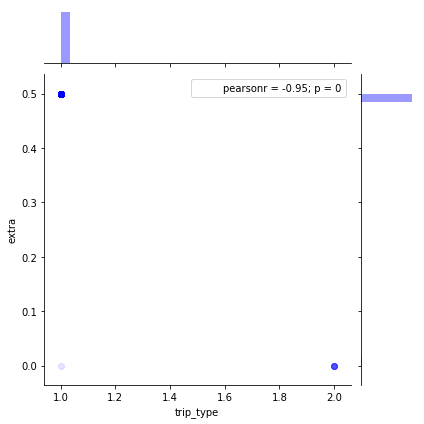

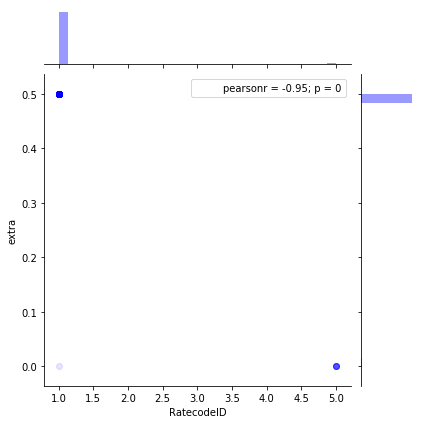

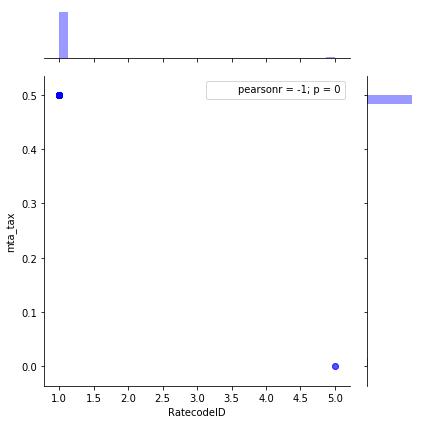

In [9]:
#and look at the negative correlation:

sns.jointplot(taxi['trip_type'], taxi['extra'], alpha=0.1, color='blue')
sns.jointplot(taxi['RatecodeID'], taxi['extra'], alpha=0.1, color='blue')
sns.jointplot(taxi['RatecodeID'], taxi['mta_tax'], alpha=0.1, color='blue')
plt.tight_layout() 
plt.show()

In [11]:
"""
we have negative correlations: 
- 3 for RatecodeID;
- 3 for trip_type
"""
# taxi['RatecodeID'].unique() 
"""
The final rate code in effect at the end of the trip. we don't need this, delete. 
remember : this is sample set! if u want to see code for JFK or Nassau, don't do this! 
    we haven't code: 6 (group ride) in all set. 
    
but what with trip_type? we have only 2 values:
1= Street-hail
2= Dispatch
"""
taxi['trip_type'].unique()

"""
we can delete this, but trip_type is related with other, not so important datas.
Maybe we should delete them too:
- extra
- mta_tax
- improvement_surcharge
The above points are extras, surcharges or taxes. Nothing for analysis. 
"""


array([1., 2.])

In [ ]:
"""
#deleting columns (i won't do this, this is my own analysis, not for any company)
taxi.drop('RatecodeID', axis=1, inplace=True)
taxi.drop('trip_type', axis=1, inplace=True)

taxi.to_csv('datas.csv', index=False)
"""

In [ ]:
"""
Column = sum_of_other_columns
Fare_amount
Tolls_amount
Total_amount

"""